In [1]:
import sklearn
sklearn.__version__

'1.1.2'

In [2]:
!pip install scikit-learn --user --upgrade

# 1. Linear Regression
### 공부 시간에 따른 시험 점수

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# import warnings
# warnings.filterwarnings('ignore')

In [3]:
# 한글처리
plt.rcParams['font.family'] = 'Malgun Gothic'
# 음수처리
plt.rcParams['axes.unicode_minus'] = False

In [5]:
df = pd.read_csv("./dataset/score.csv")

In [6]:
df.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


### 1. 독립변수와 종속변수 분리

In [7]:
# 독립변수(원인)
# X = df["hour"].values
X = df.iloc[:, :-1].values


# 종속변수(결과)
# y = df['score'].values
y = df.iloc[:, -1].values

In [8]:
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

### 1. 전체 데이터 기준 - 단순선형회귀 기본값

In [9]:
# 회귀분석을 위해서 사이킷런에서 제공하는 모듈

from sklearn.linear_model import LinearRegression

In [10]:
# 객체 생성

lr = LinearRegression()

In [11]:
# 모델 생성 후 학습

lr.fit(X, y)

LinearRegression()

In [12]:
# 예측

y_pred = lr.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

In [13]:
# 실제 점수
y

array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
        68,  72,  58,  76,  86,  90, 100], dtype=int64)

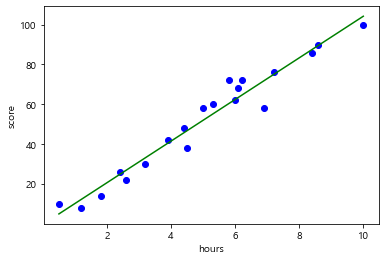

In [15]:
# 실제 데이터
plt.scatter(X,y,color='blue')
# 추세선(최소제곱화)
plt.plot(X, y_pred, color='green')

plt.xlabel('hours')
plt.ylabel('score')

plt.show()

In [16]:
# 기울기

lr.coef_

array([10.44369694])

In [17]:
# 절편

lr.intercept_

-0.21848470286721522

In [18]:
# 9시간 공부했을 때 점수는?

print("9시간 공부했을 때 예상 점수 : ",lr.predict([[9]]))

9시간 공부했을 때 예상 점수 :  [93.77478776]


### 2. 데이터 세트 분리

In [19]:
# 전체 데이터
X,y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [20]:
# 전체 데이터 셋을 훈련 데이터 셋과 테스트 데이터 셋 분리

from sklearn.model_selection import train_test_split

# X : 독립변수(원인)
# y : 종속변수(결과)
# test_size : 전체 데이터 셋에서 테스트 데이터 셋의 비율
# random_state : 실행할 때마다 동일하게 데이터 셋 분리

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16, 1) (4, 1) (16,) (4,)


### 1) 선형회귀모델 - 기본값

In [22]:
lr = LinearRegression()

In [23]:
# 학습 데이터셋으로 훈련

lr.fit(X_train,y_train)

LinearRegression()

In [24]:
# 예측

y_train_pred = lr.predict(X_train)

### 데이터 시각화 (학습 세트)

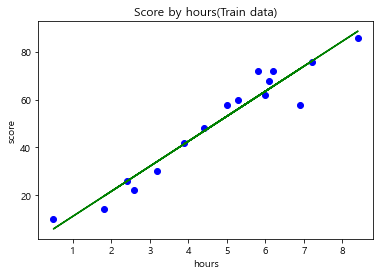

In [25]:
# 실제 데이터
plt.scatter(X_train,y_train,color='blue')
# 추세선(최소제곱화)
plt.plot(X_train, y_train_pred, color='green')

plt.title("Score by hours(Train data)")
plt.xlabel('hours')
plt.ylabel('score')

plt.show()

### 데이터 시각화 (테스트 세트)

#### 예측 - 테스트 세트

In [26]:
# 모델에 테스트 데이터 셋을 넣은 후 예측

y_test_pred = lr.predict(X_test)

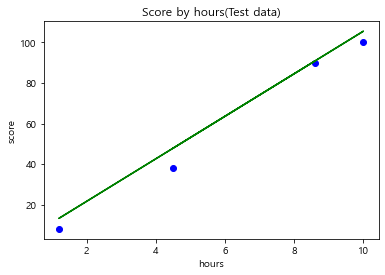

In [27]:
# 실제 데이터
plt.scatter(X_test,y_test,color='blue')
# 추세선(최소제곱화)
plt.plot(X_test, y_test_pred, color='green')

plt.title("Score by hours(Test data)")
plt.xlabel('hours')
plt.ylabel('score')

plt.show()

In [29]:
# 기울기와 절편

lr.coef_, lr.intercept_

(array([10.49161294]), 0.6115562905169796)

### 모델 평가

In [30]:
lr.score(X_test, y_test)

0.9727616474310156

In [31]:
lr.score(X_train, y_train)

0.9356663661221668

### 다양한 평가 지표 (회귀 모델)

<b>1. MAE (Mean Absolute Error) : (실제 값과 예측 값) 차이의 절대값</b>

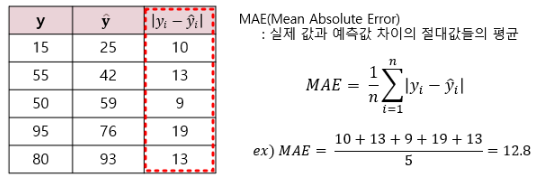

**2. MSE (Mean Squared Error) : 차이의 제곱**
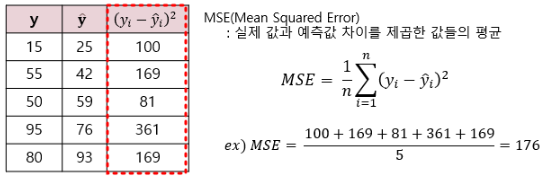

**3. RMSE (Root Mean Squared Error) : 차이의 제곱에 루트**
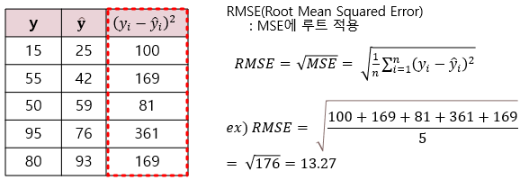

**4. R2 : 결정 계수**
> 데이터 분산을 기반으로 한 평가 지표
> 
> https://blog.minitab.com/en/statistics-and-quality-data-analysis/r-squared-sometimes-a-square-is-just-a-square

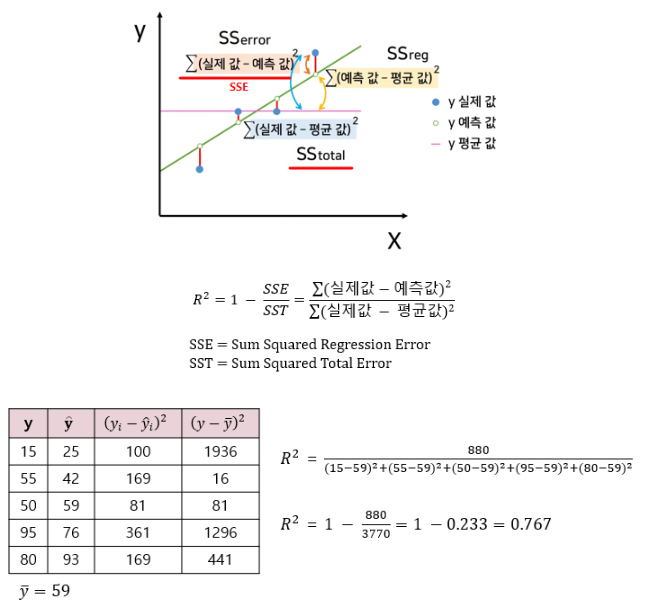

#### R2 는 1에 가까울수록, 나머지는 0에 가까울수록 좋음

#### 1. MAE(Mean Absolute Error) : 실제값 - 예측값 차이의 절대값

In [32]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_test_pred)

5.348104884463469

#### 2. MSE(Mean Squared Error) : (실제값 - 예측값) 차이의 제곱

In [33]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_test_pred)

38.705699000526884

#### 3. RMSE(Root Mean Absolute Error) : 실제값 - 예측값 차이의 제곱값에 루트

In [34]:
mean_squared_error(y_test, y_test_pred, squared=False)

6.221390439485926

<h4> 4. R<sup>2</sup>

In [35]:
from sklearn.metrics import r2_score

r2_score(y_test, y_test_pred)  # lr.score(X_test, y_test)

0.9727616474310156

## 경사 하강법 (Gradient Descent)

- 경사를 따라서 하강하는 것
- 학습률(Learning rate)
- 에포크(Epoch) : 최적의 파라미터를 찾기 위해 훈련 세트의 모든 데이터를 한번씩 사용하는 과정
- 훈련 세트를 모두 한번씩 다 사용하기 때문에 경사 하강법은 데이터 셋이 큰 경우 컴퓨터의 자원을 많이 사용하게 됨

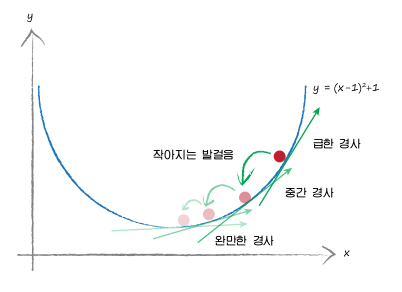

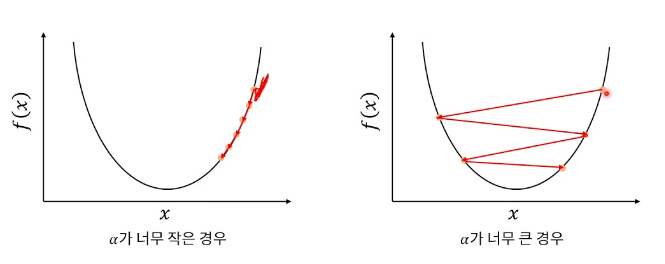

- Learning rate 가 너무 작은 경우 학습이 완료되지 않음
- Learning rate 가 너무 큰 경우 0 에 수렴하지 못할 수도 있음
- 일반적으로(0.001, 0.003, 0.01, 0.03, 0.1, 0.3)

## 확률적 경사 하강법 (Stochastic Gradient Descent)

- 경사하강법의 모든 데이터 셋을 적용하는 방법은 cost가 높기 때문에 랜덤으로 추출된 데이터 하나를 뽑아서 기울기 구하기
- 그 다음 데이터를 또 추출하여 기울기를 구해 나가는 방법(이렇게 전체 데이터를 추출해 기울기를 구해 나감)
- 경사 하강법보다 속도가 아주 빠름

<img src="http://alykhantejani.github.io/images/gradient_descent_line_graph.gif">

[출처] http://alykhantejani.github.io/images/gradient_descent_line_graph.gif

- 왼쪽에 있는 거( y = mx + b) 식에서 m과 b의 값에 의해 Error(Loss) 가 표시되고 있음
- 3차원 공간으로 표현해 줌(맨 꼭대기에서 경사를 따라서 내려오면서 loss 가 작아지는 부분을 찾아 내려오게 됨
- 이 과정에서 오른쪽에 있는 평면 그래프를 보면 처음에 그려지는 기울기가 점점 변하면서 데이터셋에 알맞는 기울기 경사를 찾게 되는 걸 볼 수 있음

```
SGDRegressor(
    loss='squared_error', *, penalty='l2', alpha=0.0001, l1_ratio=0.15,fit_intercept=True, 
    max_iter=1000,tol=0.001,shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', 
    eta0=0.01,power_t=0.25, early_stopping=False,  validation_fraction=0.1, n_iter_no_change=5, warm_start=False, 
    average=False,
)
```

In [36]:
from sklearn.linear_model import SGDRegressor  # 확률적 경사 하강법이 적용된 회귀

In [41]:
# max_iter=1000 (훈련세트 반복 횟수) : Epoch
# eta0=0.01 (학습률 Learning rate)
# verbose=1 (실행단계 보여주기)

# 지수 표기법
# 0.01(10^-2) : 1e-2 
# 0.001(10^-3) : 1e-3 
# 0.0001(10^-4) : 1e-4 
# 1000(10^3) : 1e+3 

sr = SGDRegressor(max_iter=100, eta0=0.0001, random_state=0, verbose=1)
sr.fit(X_train,y_train)

-- Epoch 1
Norm: 0.27, NNZs: 1, Bias: 0.048869, T: 16, Avg. loss: 1484.241876
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.47, NNZs: 1, Bias: 0.083896, T: 32, Avg. loss: 1419.741822
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.64, NNZs: 1, Bias: 0.114272, T: 48, Avg. loss: 1367.983092
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.79, NNZs: 1, Bias: 0.141552, T: 64, Avg. loss: 1322.870279
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.94, NNZs: 1, Bias: 0.166772, T: 80, Avg. loss: 1282.550224
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: 0.190476, T: 96, Avg. loss: 1245.587071
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 1, Bias: 0.212877, T: 112, Avg. loss: 1211.227118
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.32, NNZs: 1, Bias: 0.234194, T: 128, Avg. loss: 1179.037565
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.43, NNZs: 1, Bias: 0.254556, T: 144, Avg. loss: 1148.814106
Total training 

SGDRegressor(eta0=0.0001, max_iter=100, random_state=0, verbose=1)

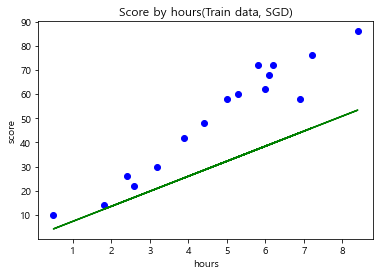

In [42]:
# 실제 데이터
plt.scatter(X_train,y_train,color='blue')
# 추세선(최소제곱화)
plt.plot(X_train,sr.predict(X_train), color='green')
plt.title("Score by hours(Train data, SGD)")
plt.xlabel('hours')
plt.ylabel('score')

plt.show()

In [43]:
sr = SGDRegressor(random_state=0, verbose=1)
sr.fit(X_train,y_train)

-- Epoch 1
Norm: 9.29, NNZs: 1, Bias: 1.896809, T: 16, Avg. loss: 273.972341
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 10.22, NNZs: 1, Bias: 2.051952, T: 32, Avg. loss: 21.528918
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 10.29, NNZs: 1, Bias: 2.048223, T: 48, Avg. loss: 19.357188
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 10.18, NNZs: 1, Bias: 2.017074, T: 64, Avg. loss: 19.101267
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 10.04, NNZs: 1, Bias: 1.980206, T: 80, Avg. loss: 18.424713
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 10.19, NNZs: 1, Bias: 1.995352, T: 96, Avg. loss: 19.235589
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 10.33, NNZs: 1, Bias: 2.005374, T: 112, Avg. loss: 18.213245
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 10.19, NNZs: 1, Bias: 1.971733, T: 128, Avg. loss: 18.722017
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 10.08, NNZs: 1, Bias: 1.941770, T: 144, Avg. loss: 18.247385
Total training time: 0.0

SGDRegressor(random_state=0, verbose=1)

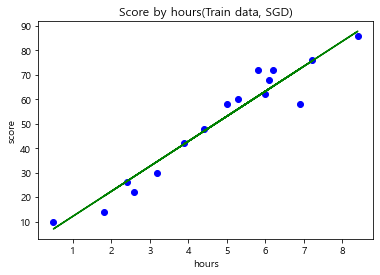

In [44]:
# 실제 데이터
plt.scatter(X_train,y_train,color='blue')
# 추세선(최소제곱화)
plt.plot(X_train,sr.predict(X_train), color='green')
plt.title("Score by hours(Train data, SGD)")
plt.xlabel('hours')
plt.ylabel('score')

plt.show()